# The Sparks Foundation-GRIPJUNE22

## Task 6 = Classification on IRIS dataset using Decision Tree Classifier

### Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Import Data

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.drop(columns=['Id'], inplace=True)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Model building

In [7]:
# split data into independent and target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]

X.shape

(150, 4)

In [8]:
y = df['Species']

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25,
                                               random_state=1, stratify=y)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

In [10]:
dt_clf = DecisionTreeClassifier()

# fit train data
dt_clf.fit(xtrain.values, ytrain)

DecisionTreeClassifier()

In [11]:
prediction = dt_clf.predict(xtest.values)

In [12]:
print(metrics.classification_report(y_true = ytest, y_pred = prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



### Visualize Decision tree

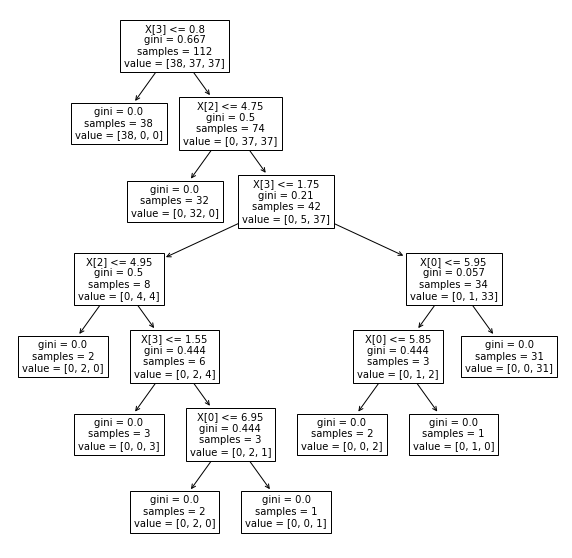

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(dt_clf, fontsize=10)
plt.show()

### Save model (serialization)

In [14]:
from pickle import dump

In [15]:
dump(dt_clf, open("dt_model.pkl","wb"))